In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [427]:
df =pd.read_csv('/Users/chunsheng/Desktop/archive (1)/BTC-USD (2014-2024).csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [428]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN
3412,2024-01-21,41671.488281,41693.160156,41615.140625,41623.695313,41623.695313,1.127404e+10


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


In [430]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [431]:
df.dropna(inplace=True)

In [432]:
df.shape

(3412, 7)

<Axes: >

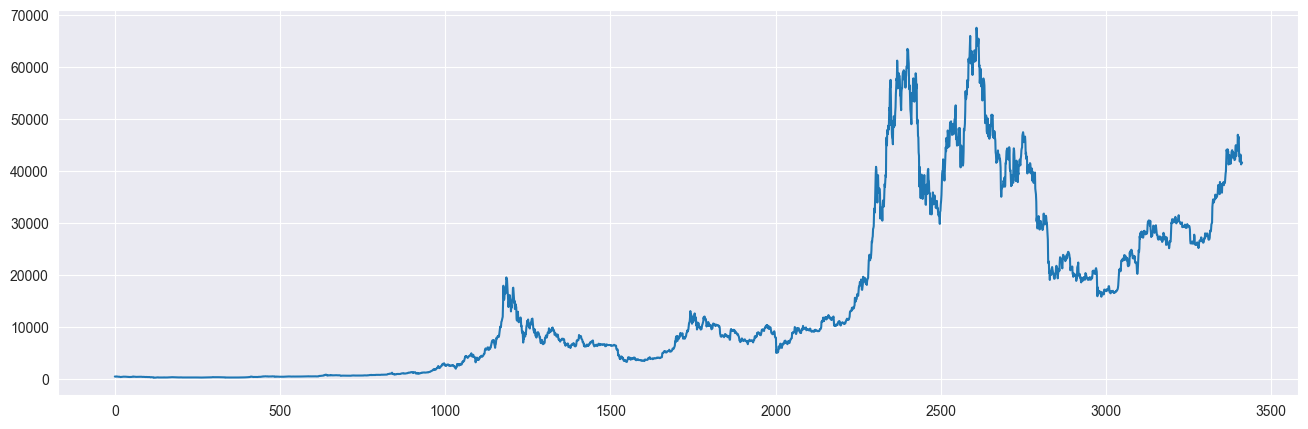

In [433]:
# ploting chart
plt.figure(figsize=(16,5))
df['Adj Close'].plot()

In [434]:
# change Data type
df['Date'] = pd.to_datetime(df['Date'])

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3412 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 213.2 KB


In [436]:
# set date to index
df.set_index('Date', inplace=True)

In [437]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


Method : 1¶

In [438]:
# Testing data is stationery
test_result=adfuller(df['Adj Close'])
# check pvalue is greater than siginficance
test_result[1] <= 0.05

False

In [439]:
# Make data is stationery using differencing method
df['First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

# seasonal differnce
df['Seasonal First Difference']=df['Adj Close']-df['Adj Close'].shift(12)
df.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,Seasonal First Difference
Date,,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-29.644012,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,14.108002,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-10.082978,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,3.330994,NaN


In [440]:
# checking  stationery after differcing
First_test_result = adfuller(df['First Difference'].dropna())
First_test_result[1] <= 0.05

True

In [441]:
# checking  stationery after differcing seasonal differencing
second_test_result = adfuller(df['Seasonal First Difference'].dropna())
second_test_result[1] <= 0.05


True

<Axes: xlabel='Date'>

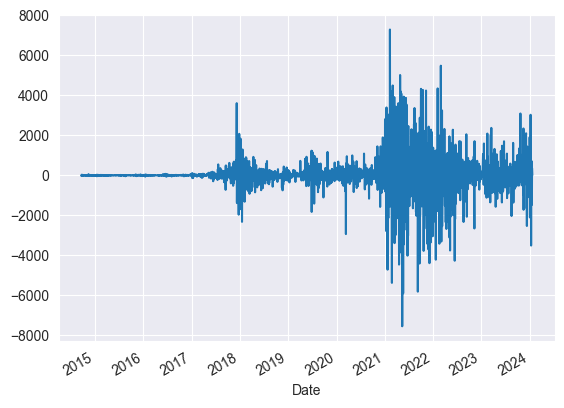

In [442]:
# plot first oreder diffencing
df['First Difference'].plot()

<Axes: xlabel='Date'>

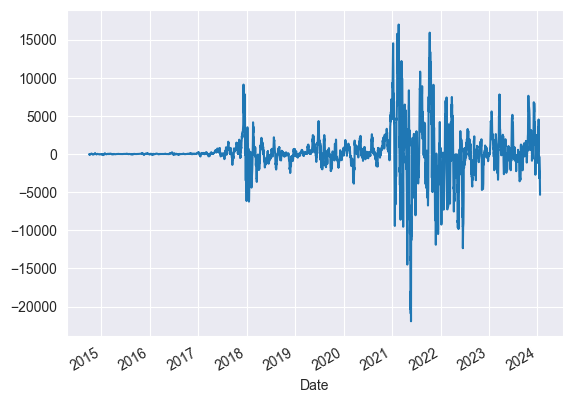

In [443]:
# plot Seasonal First Difference
df['Seasonal First Difference'].plot()

<Figure size 1500x800 with 0 Axes>

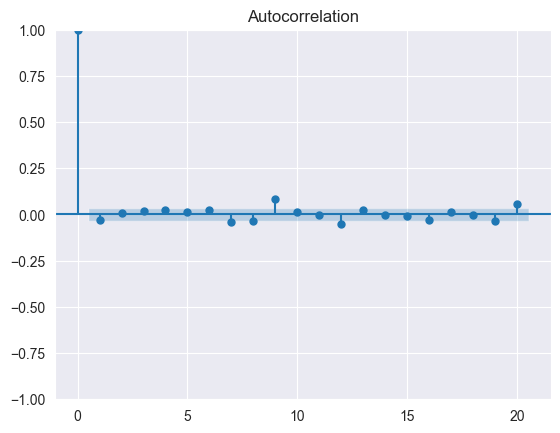

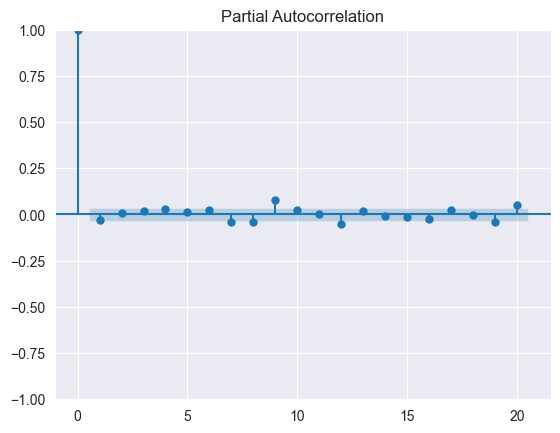

In [444]:
#plot ACF AND PACF
fig = plt.figure(figsize=(15,8))
fig = plot_acf(df['First Difference'].dropna(),lags=20)
fig = plot_pacf(df['First Difference'].dropna(),lags=20)


<Figure size 1500x800 with 0 Axes>

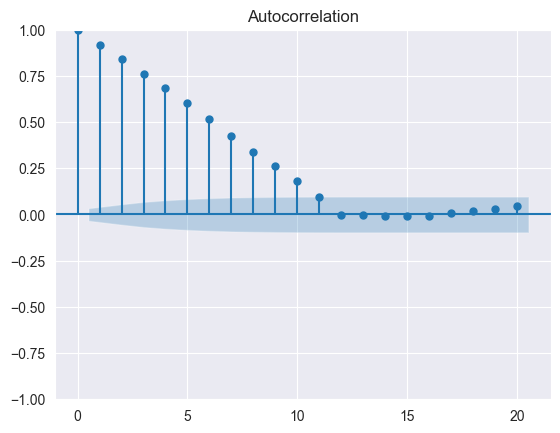

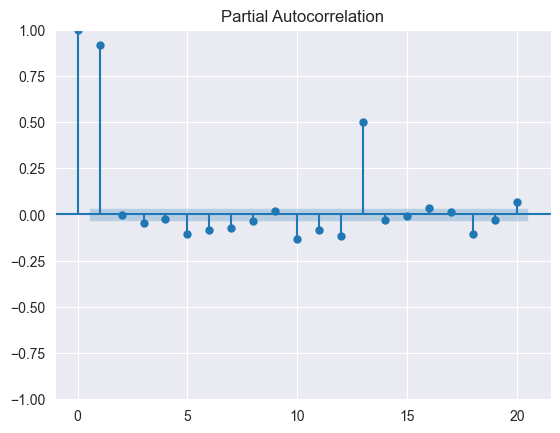

In [445]:
# for Seasonal First Difference
fig = plt.figure(figsize=(15,8))
fig = plot_acf(df['Seasonal First Difference'].dropna(),lags=20)
fig = plot_pacf(df['Seasonal First Difference'].dropna(),lags=20)


In [446]:
to_row = int(len(df)*0.9)

# Split the data
train_data = df[:to_row]['First Difference']
test_data = df[to_row:]['First Difference']

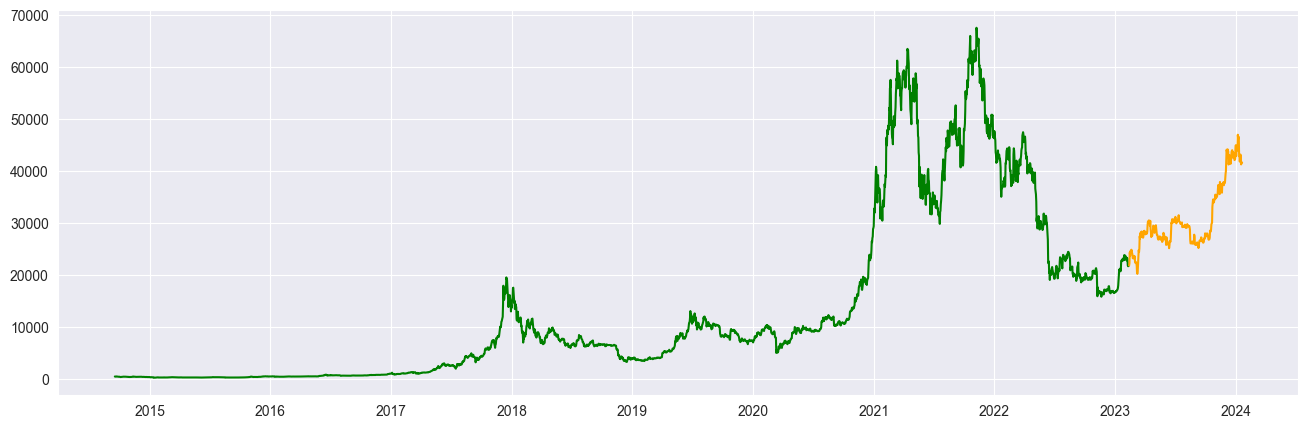

In [447]:
# plot splited data
plt.figure(figsize=(16,5))
plt.plot(df[:to_row]['Adj Close'],color='Green',label="train")
plt.plot(df[to_row:]['Adj Close'],color='orange',label="test")

In [448]:
# Arima model Building
model=ARIMA(train_data,order=(1,1,1))
model_fit=model.fit()

/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

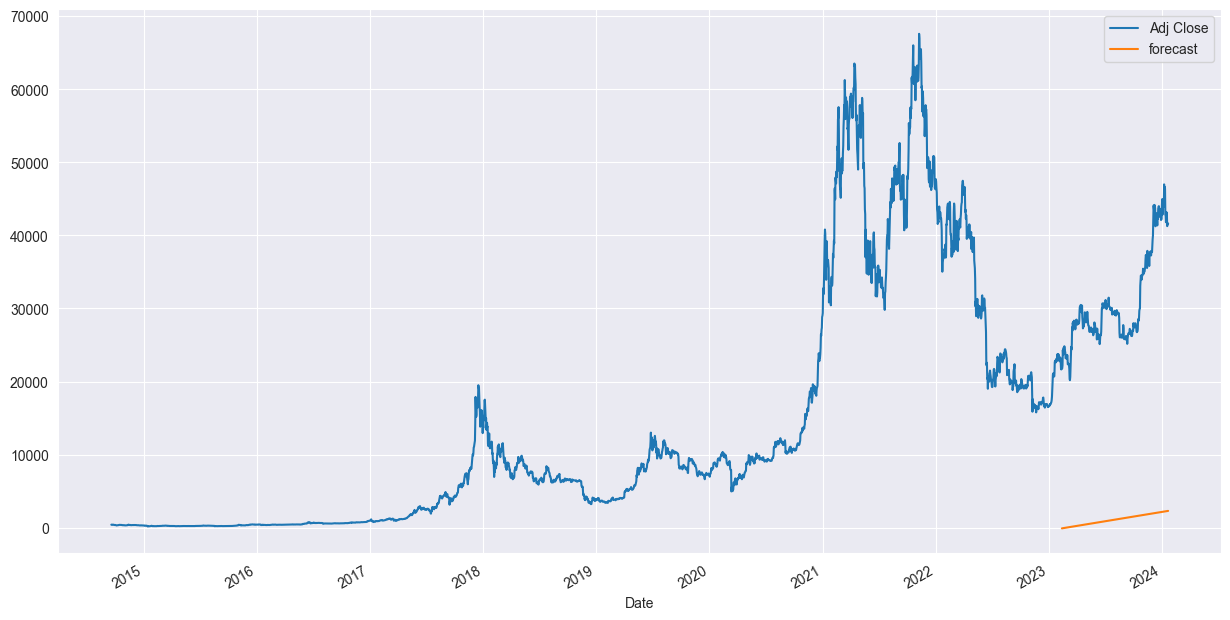

In [449]:
forecast_diff=model_fit.predict(start=max(train_data.index),end=max(test_data.index))

# invert differenced prediction to  orginal scale
df['forecast'] = train_data.iloc[-1] + np.cumsum(forecast_diff)

df[['Adj Close','forecast']].plot(figsize=(15,8))


In [450]:
train_data = df[:to_row]['Seasonal First Difference']
test_data = df[to_row:]['Seasonal First Difference']


In [451]:
# Try another model SARIMAX
sr_model=SARIMAX(train_data,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=sr_model.fit()
sarimax_forecast_diff =results.predict(start=max(train_data.index),end=max(test_data.index))

# invert differenced prediction to  orginal scale
df['forecast_sr'] = train_data.iloc[-12] + np.cumsum(sarimax_forecast_diff)


/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64278D+00    |proj g|=  3.77214D-02

At iterate    5    f=  8.62847D+00    |proj g|=  3.06875D-03

At iterate   10    f=  8.62602D+00    |proj g|=  3.78470D-04

At iterate   15    f=  8.62518D+00    |proj g|=  1.11240D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<Axes: xlabel='Date'>

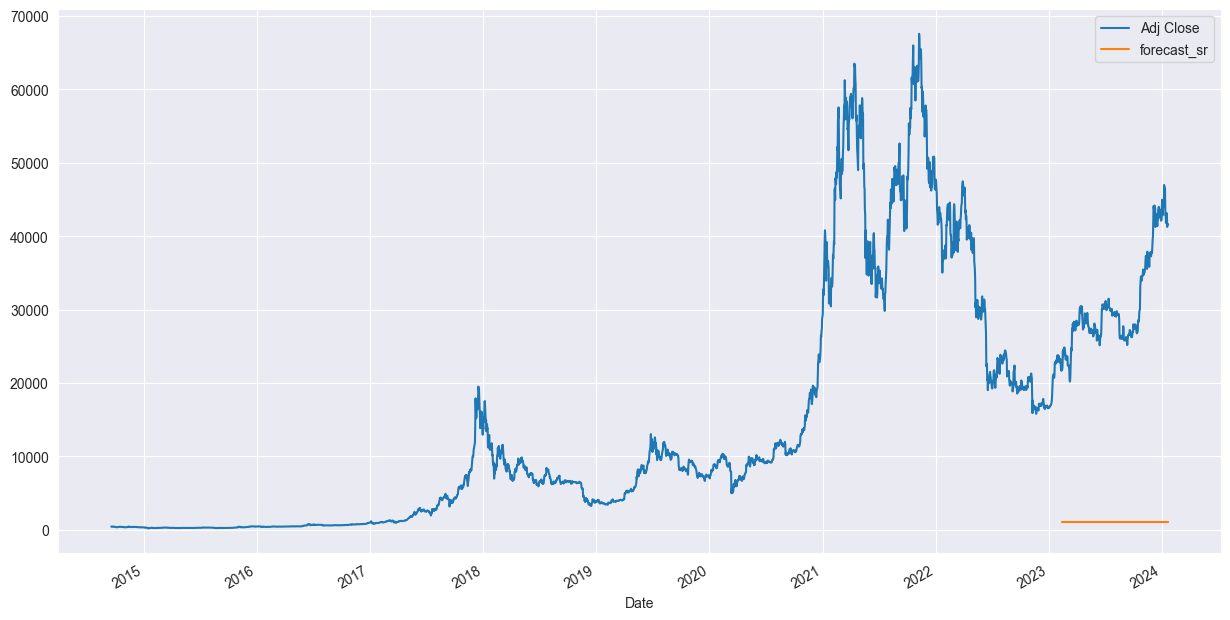

In [452]:
# plot sarimax model prediction
df[['Adj Close','forecast_sr']].plot(figsize=(15,8))

Method : 2

In [468]:
# convert splited data to list

train_data = df[:to_row]['Adj Close']
test_data = df[to_row:]['Adj Close']

train_data_list = list(train_data)
test_data_list = list(test_data)
test_datas = test_data.index


In [471]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train_data_list', 'test_data_list', and 'test_datas' are already defined
model_pred = []
num_of_ob = len(test_data_list)

# ARIMA model parameters
p = 1
d = 1
q = 1

# Loop through the number of observations
for i in range(num_of_ob):
    model = ARIMA(train_data_list, order=(p, d, q))
    arima_model = model.fit()
    output = arima_model.forecast()
    y_hat = output[0]
    model_pred.append(y_hat)
    
    # Append the actual test value to the training list
    actual_test_value = test_data_list[i]
    train_data_list.append(actual_test_value)

# Convert dates to a pandas Series (assuming test_datas is already available)
dates = pd.Series(test_datas[:len(model_pred)])  # Ensure the length matches

# Create a DataFrame with the predictions, actual values, and dates
results_df = pd.DataFrame({
    'Date': dates,
    'Predicted': model_pred,
    'Actual': test_data_list[:len(model_pred)]
})

# Save the DataFrame to a CSV file
results_df.to_csv('/Users/chunsheng/Desktop/archive (1)/arima_results_corrected.csv', index=False)


In [455]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3411
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27572.425
Date:                Thu, 17 Oct 2024   AIC                          55150.851
Time:                        16:25:21   BIC                          55169.254
Sample:                             0   HQIC                         55157.427
                               - 3411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1103      0.303     -0.364      0.716      -0.704       0.483
ma.L1          0.0815      0.304      0.268      0.789      -0.514       0.678
sigma2      6.184e+05   5039.698    122.698      0.0

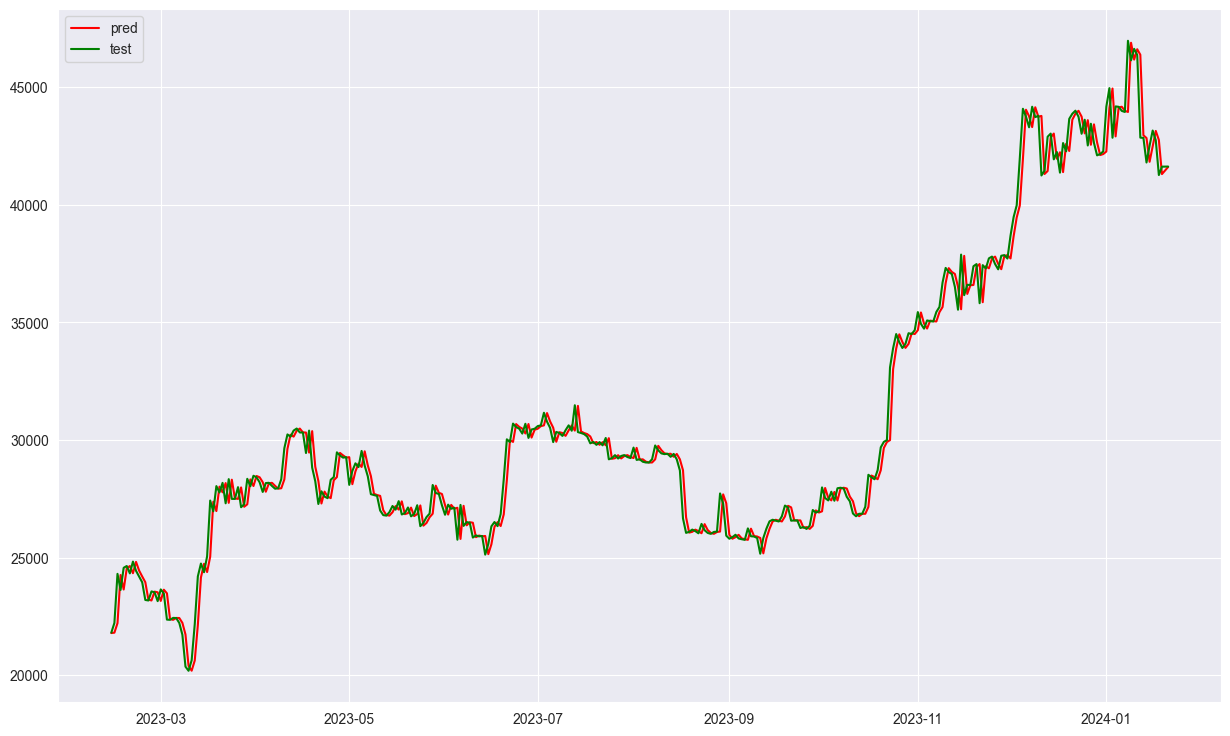

In [456]:
plt.figure(figsize=(15,9))
date_range = df[to_row:].index
plt.plot(date_range,model_pred,color='Red',label='pred')
plt.plot(date_range,test_data_list,color='Green',label='test')
plt.legend()
plt.show()

ETH Prediction for one day with RMSE of 149


In [371]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error


import os
for dirname, _, filenames in os.walk('/Users/chunsheng/Desktop/archive (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/chunsheng/Desktop/archive (1)/ETH-USD (01-05.2024).csv
/Users/chunsheng/Desktop/archive (1)/BTC-USD (2014-2024).csv
/Users/chunsheng/Desktop/archive (1)/Bitcoin USD (01-05.2024).csv
/Users/chunsheng/Desktop/archive (1)/ETH-USD (2017-2024).csv


In [372]:
df = pd.read_csv('/Users/chunsheng/Desktop/archive (1)/ETH-USD (2017-2024).csv')


In [373]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
1,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
3,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
4,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09


In [374]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2259,2024-01-17,2587.044678,2592.737061,2508.432861,2528.369385,2528.369385,1.044102e+10
2260,2024-01-18,2528.593262,2546.263916,2426.135498,2467.018799,2467.018799,1.190003e+10
2261,2024-01-19,2468.688965,2501.305176,2414.710938,2489.498535,2489.498535,1.140528e+10
2262,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2263,2024-01-21,2469.798584,2469.798584,2464.171875,2465.659180,2465.659180,5.195812e+09


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2263 non-null   float64
 2   High       2263 non-null   float64
 3   Low        2263 non-null   float64
 4   Close      2263 non-null   float64
 5   Adj Close  2263 non-null   float64
 6   Volume     2263 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [376]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2.263000e+03
mean,1248.213140,1283.972388,1208.851543,1248.970441,1248.970441,1.205243e+10
std,1118.835543,1150.922648,1082.560829,1118.566081,1118.566081,1.012443e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,231.636727,236.766563,227.149369,231.901916,231.901916,4.845689e+09
50%,1038.186646,1090.229980,956.325012,1039.099976,1039.099976,9.401190e+09
75%,1870.983582,1905.373352,1844.880860,1871.952942,1871.952942,1.657259e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [377]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

EDA

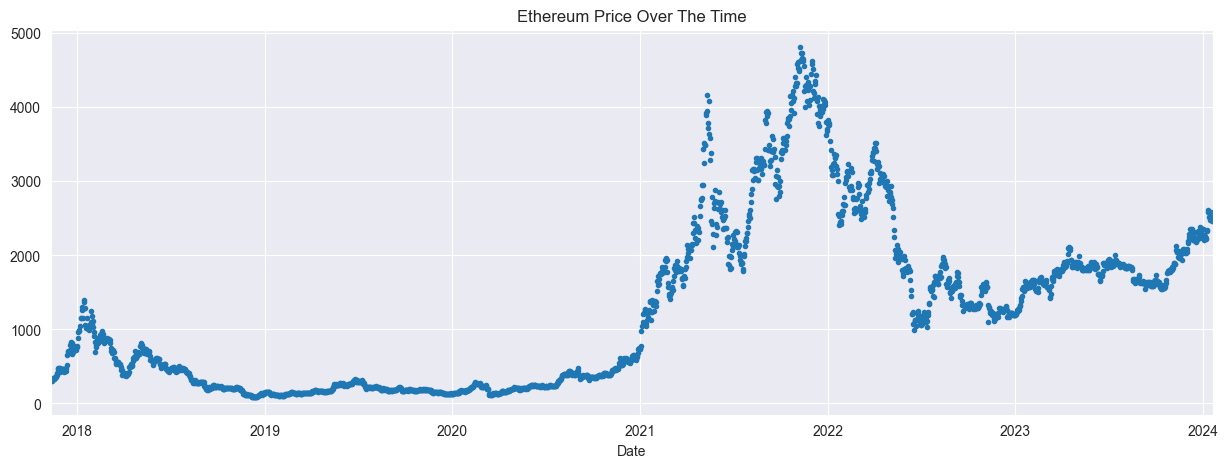

In [378]:
df['Close'].plot(style='.',
        figsize=(15, 5), 
        title='Ethereum Price Over The Time')
plt.show()

<Axes: ylabel='Frequency'>

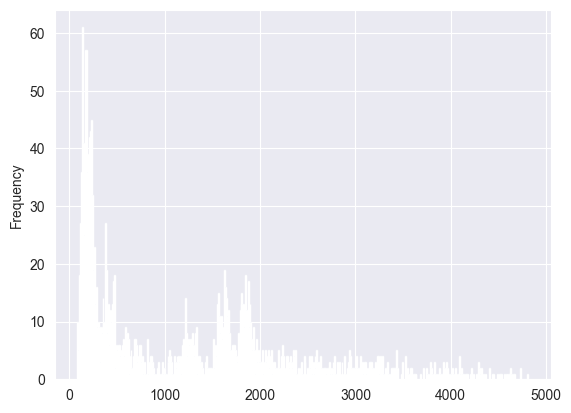

In [379]:
df['Close'].plot(kind='hist', bins=500)

In [380]:
df['Close'] = np.log1p(df['Close'])

<Axes: ylabel='Frequency'>

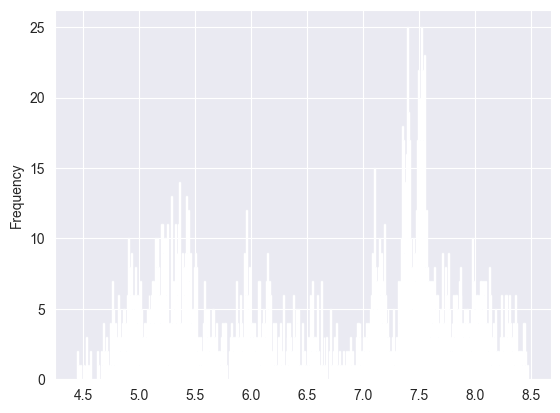

In [381]:
df['Close'].plot(kind='hist', bins=500)

Creating Features

In [382]:
target_map = df['Close'].to_dict()
df['ETH+1'] = (df.index + pd.Timedelta('1 days')).map(target_map)
df['ETH+2'] = (df.index + pd.Timedelta('2 days')).map(target_map)
df['ETH+3'] = (df.index + pd.Timedelta('3 days')).map(target_map)
df

,Open,High,Low,Close,Adj Close,Volume,ETH+1,ETH+2,ETH+3
Date,,,,,,,,,
2017-11-10,320.670990,324.717987,294.541992,5.704625,299.252991,8.859860e+08,5.754732,5.733043,5.761158
2017-11-11,298.585999,319.453003,298.191986,5.754732,314.681000,8.423010e+08,5.733043,5.761158,5.824911
2017-11-12,314.690002,319.153015,298.513000,5.733043,307.907990,1.613480e+09,5.761158,5.824911,5.812209
2017-11-13,307.024994,328.415009,307.024994,5.761158,316.716003,1.041890e+09,5.824911,5.812209,5.804906
2017-11-14,316.763000,340.177002,316.763000,5.824911,337.631012,1.069680e+09,5.812209,5.804906,5.809325
...,...,...,...,...,...,...,...,...,...
2024-01-17,2587.044678,2592.737061,2508.432861,7.835725,2528.369385,1.044102e+10,7.811171,7.820238,NaN
2024-01-18,2528.593262,2546.263916,2426.135498,7.811171,2467.018799,1.190003e+10,7.820238,NaN,7.810620
2024-01-19,2468.688965,2501.305176,2414.710938,7.820238,2489.498535,1.140528e+10,NaN,7.810620,NaN


In [383]:
df['moving_avg'] = df['Close'].rolling(window = 20).mean()
df['ema_12'] = df['Close'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['Close'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['Close'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['Close'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ETH+1,ETH+2,ETH+3,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,,,,,,,,,
2024-01-17,2587.044678,2592.737061,2508.432861,7.835725,2528.369385,1.044102e+10,7.811171,7.820238,NaN,7.779447,7.814149,7.780192,0.033957,0.028380,67.735813,-32.0
2024-01-18,2528.593262,2546.263916,2426.135498,7.811171,2467.018799,1.190003e+10,7.820238,NaN,7.81062,7.782936,7.813691,7.782487,0.031204,0.028945,61.095281,-32.0
2024-01-19,2468.688965,2501.305176,2414.710938,7.820238,2489.498535,1.140528e+10,NaN,7.810620,NaN,7.787066,7.814698,7.785283,0.029415,0.029039,62.037101,-32.0
2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN,7.810620,NaN,NaN,NaN,7.814698,7.785283,0.029415,0.029114,64.025238,NaN
2024-01-21,2469.798584,2469.798584,2464.171875,7.810620,2465.659180,5.195812e+09,NaN,NaN,NaN,NaN,7.813977,7.787298,0.026679,0.028627,65.497294,NaN


In [393]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

KeyError: "['Open', 'High', 'Low', 'Adj Close', 'Volume'] not found in axis"

In [394]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

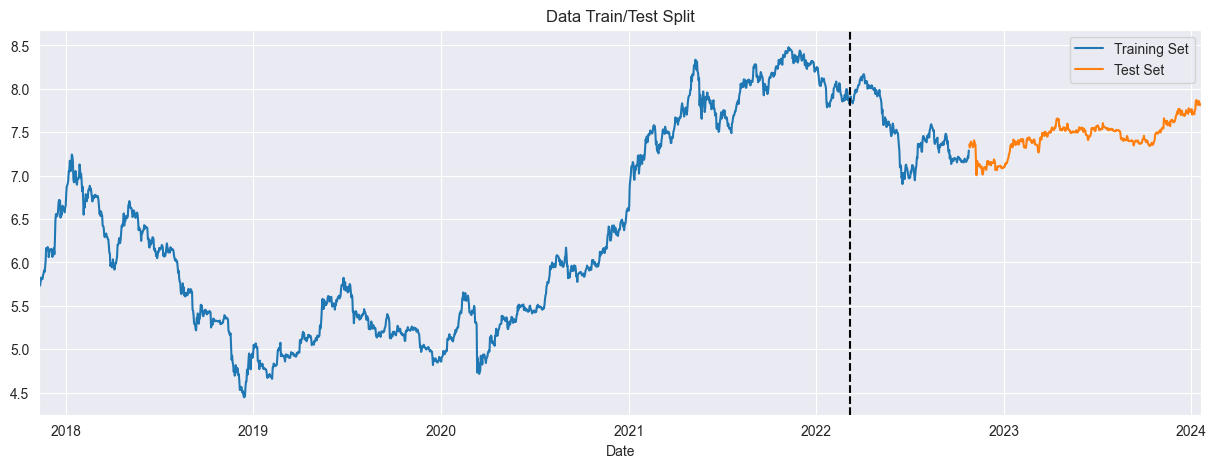

In [395]:
fig, ax = plt.subplots(figsize=(15, 5))
df_train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['Close'].plot(ax=ax, label='Test Set')
ax.axvline('2022-03-8', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [396]:
y_train = df_train['ETH+1']
y_test = df_test['ETH+1']
x_train = df_train.drop(['Close', 'ETH+1','ETH+2','ETH+3'], axis =1)
x_test = df_test.drop(['Close','ETH+1', 'ETH+2', 'ETH+3'], axis = 1)
test_dates=y_test.index

Model Training

In [397]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)


reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:5.94939	validation_1-rmse:6.87059
[100]	validation_0-rmse:2.18961	validation_1-rmse:2.55226


/Users/chunsheng/PycharmProjects/pythonProject1/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:0.81038	validation_1-rmse:1.03487
[300]	validation_0-rmse:0.30641	validation_1-rmse:0.60322
[400]	validation_0-rmse:0.12852	validation_1-rmse:0.52934
[500]	validation_0-rmse:0.07434	validation_1-rmse:0.52320
[548]	validation_0-rmse:0.06583	validation_1-rmse:0.52347


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [398]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

199.5752351367804

In [399]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.6317398524030213

In [413]:
import pandas as pd

# Assuming you have the dates for the test set stored separately
dates = pd.Series(test_dates)  # Replace with your actual date data
results = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred})

# Display or plot the results
print(results.head())
y_pred = np.array(y_pred)
y_test = np.array(y_test)
results = results.dropna()
# Correct the date by adding/subtracting days
results['Date'] = results['Date'] + pd.Timedelta(days=1)
# Remove rows with null values or zero values in the 'Actual' column
results = results.dropna(subset=['Actual'])
results = results[results['Actual'] != 0]

# Remove the last row of the DataFrame
results = results[:-1]

results.to_csv('/Users/chunsheng/Desktop/archive (1)/prediction ETH.csv', index=False)


        Date       Actual    Predicted
0 2022-10-26  1514.374878  1464.015869
1 2022-10-27  1555.477905  1458.540894
2 2022-10-28  1619.698486  1460.270020
3 2022-10-29  1590.783325  1560.162720
4 2022-10-30  1572.714478  1554.095581


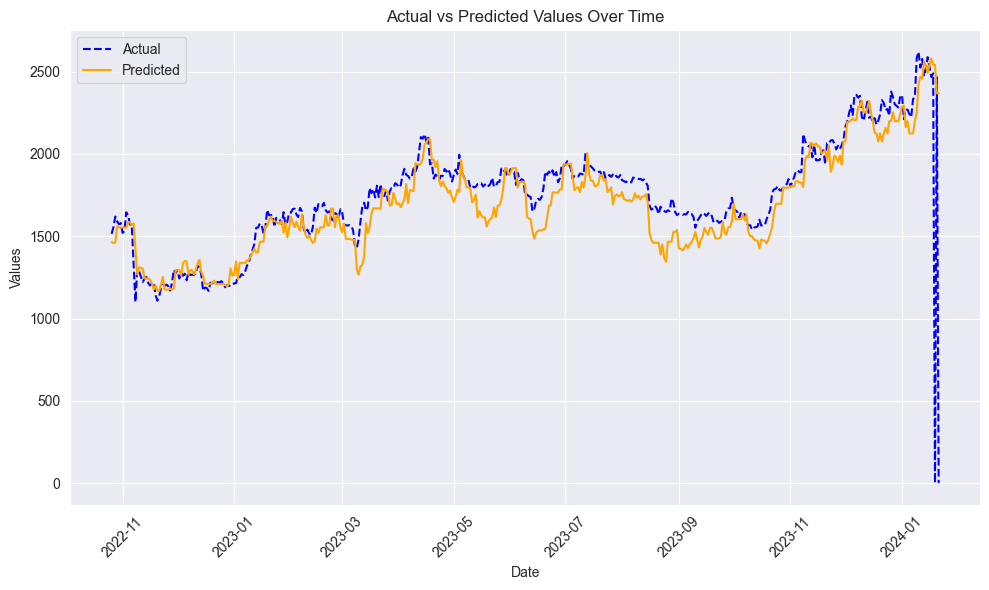

In [415]:
 import matplotlib.pyplot as plt
import pandas as pd

# Example setup (assuming you have y_test, y_pred, and dates_test available as arrays or series)
results = pd.DataFrame({
    'Date': dates,       # Replace with your actual dates for the test set
    'Actual': y_test,         # Replace with your actual y_test values
    'Predicted': y_pred       # Replace with your predicted y_pred values
})

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue', linestyle='--')

# Plotting the predicted values
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='orange', linestyle='-')

# Adding titles and labels
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [331]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/chunsheng/Desktop/archive (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/Users/chunsheng/Desktop/archive (1)/ETH-USD (01-05.2024).csv
/Users/chunsheng/Desktop/archive (1)/BTC-USD (2014-2024).csv
/Users/chunsheng/Desktop/archive (1)/Bitcoin USD (01-05.2024).csv
/Users/chunsheng/Desktop/archive (1)/ETH-USD (2017-2024).csv


In [332]:
df = pd.read_csv('/Users/chunsheng/Desktop/archive (1)/BTC-USD (2014-2024).csv')


In [333]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [334]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN
3412,2024-01-21,41671.488281,41693.160156,41615.140625,41623.695313,41623.695313,1.127404e+10


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


In [336]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
std,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [337]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10


EDA

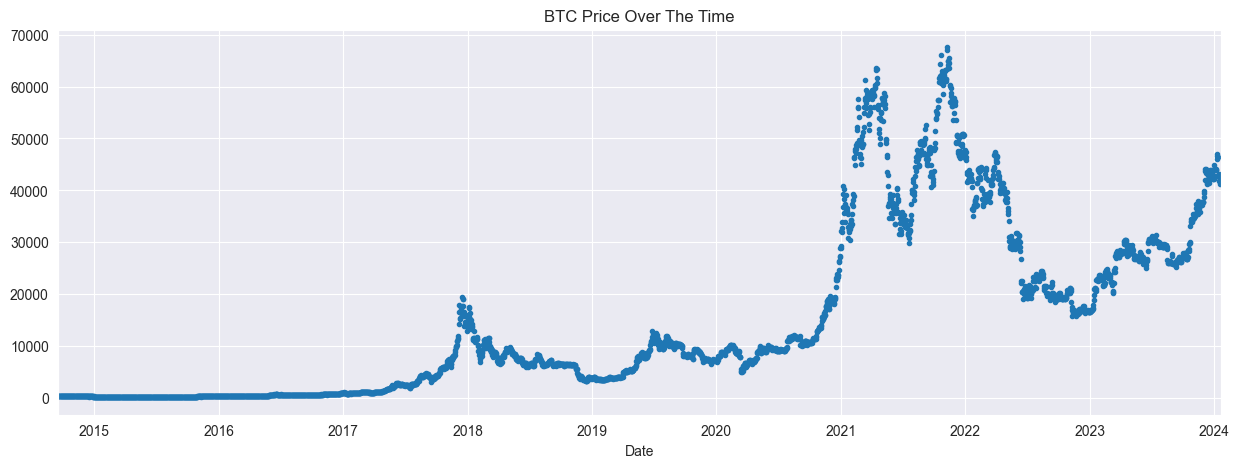

In [338]:
df['Close'].plot(style='.',
        figsize=(15, 5), 
        title='BTC Price Over The Time')
plt.show()

<Axes: ylabel='Frequency'>

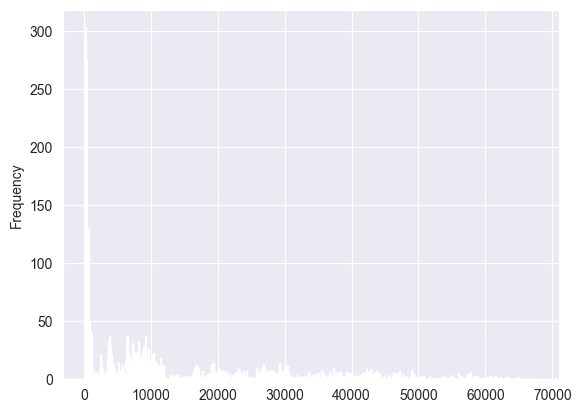

In [339]:
df['Close'].plot(kind='hist', bins=500)

In [340]:
df['Close'] = np.log1p(df['Close'])

<Axes: ylabel='Frequency'>

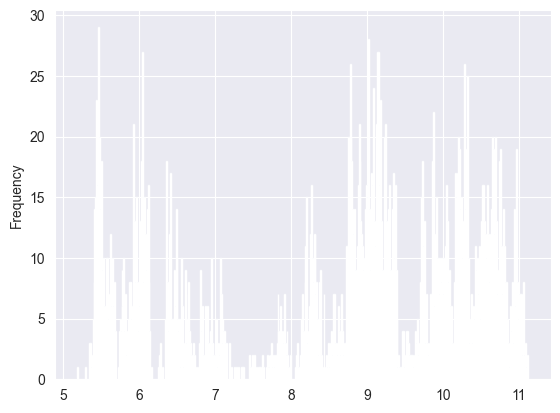

In [341]:
df['Close'].plot(kind='hist', bins=500)

In [342]:
target_map = df['Close'].to_dict()
df['BTC+1'] = (df.index + pd.Timedelta('1 days')).map(target_map)
df['BTC+2'] = (df.index + pd.Timedelta('2 days')).map(target_map)
df['BTC+3'] = (df.index + pd.Timedelta('3 days')).map(target_map)
df

,Open,High,Low,Close,Adj Close,Volume,BTC+1,BTC+2,BTC+3
Date,,,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,6.053124,424.440002,3.448320e+07,5.980899,6.015923,5.991017
2014-09-19,424.102997,427.834991,384.532013,5.980899,394.795990,3.791970e+07,6.015923,5.991017,5.999314
2014-09-20,394.673004,423.295990,389.882996,6.015923,408.903992,3.686360e+07,5.991017,5.999314,6.079455
2014-09-21,408.084991,412.425995,393.181000,5.991017,398.821014,2.658010e+07,5.999314,6.079455,6.050217
2014-09-22,399.100006,406.915985,397.130005,5.999314,402.152008,2.412760e+07,6.079455,6.050217,6.022416
...,...,...,...,...,...,...,...,...,...
2024-01-17,43132.101563,43189.890625,42189.308594,10.662976,42742.652344,2.085123e+10,10.627723,10.636322,NaN
2024-01-18,42742.312500,42876.347656,40631.171875,10.627723,41262.058594,2.521836e+10,10.636322,NaN,10.636449
2024-01-19,41278.460938,42134.160156,40297.457031,10.636322,41618.406250,2.575241e+10,NaN,10.636449,NaN


In [343]:
df['moving_avg'] = df['Close'].rolling(window = 20).mean()
df['ema_12'] = df['Close'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['Close'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['Close'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['Close'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,Open,High,Low,Close,Adj Close,Volume,BTC+1,BTC+2,BTC+3,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,,,,,,,,,
2024-01-17,43132.101563,43189.890625,42189.308594,10.662976,42742.652344,2.085123e+10,10.627723,10.636322,NaN,10.687662,10.680641,10.677866,0.002776,0.011410,49.562735,24.0
2024-01-18,42742.312500,42876.347656,40631.171875,10.627723,41262.058594,2.521836e+10,10.636322,NaN,10.636449,10.686657,10.672500,10.674151,-0.001651,0.008798,38.079710,40.0
2024-01-19,41278.460938,42134.160156,40297.457031,10.636322,41618.406250,2.575241e+10,NaN,10.636449,NaN,10.686014,10.666934,10.671349,-0.004415,0.006155,39.936217,40.0
2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN,10.636449,NaN,NaN,NaN,10.666934,10.671349,-0.004415,0.004041,40.476664,NaN
2024-01-21,41671.488281,41693.160156,41615.140625,10.636449,41623.695313,1.127404e+10,NaN,NaN,NaN,NaN,10.661542,10.668574,-0.007032,0.001826,40.623095,NaN


In [344]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

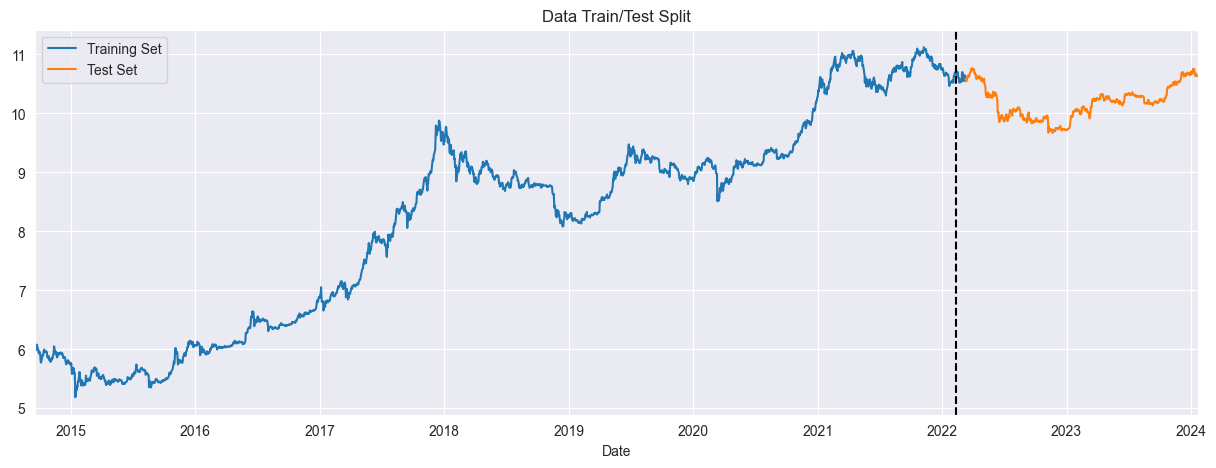

In [345]:
fig, ax = plt.subplots(figsize=(15, 5))
df_train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['Close'].plot(ax=ax, label='Test Set')
ax.axvline('2022-2-11', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [346]:
y_train = df_train['BTC+1']
y_test = df_test['BTC+1']
x_train = df_train.drop(['Close', 'BTC+1','BTC+2','BTC+3'], axis =1)
x_test = df_test.drop(['Close','BTC+1', 'BTC+2', 'BTC+3'], axis = 1)
test_dates=y_test.index




In [347]:
import xgboost as xgb
import numpy as np

# Ensure no NaN or inf values
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

# Define the model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',  # Updated objective
                       max_depth=3, learning_rate=0.01)

# Fit the model with training data and evaluate on both train and test sets
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:7.80791	validation_1-rmse:9.58022
[100]	validation_0-rmse:2.86801	validation_1-rmse:3.44552
[200]	validation_0-rmse:1.05457	validation_1-rmse:1.33466
[300]	validation_0-rmse:0.38927	validation_1-rmse:0.70759
[400]	validation_0-rmse:0.14727	validation_1-rmse:0.59307
[500]	validation_0-rmse:0.06399	validation_1-rmse:0.58381
[548]	validation_0-rmse:0.04873	validation_1-rmse:0.58432


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [348]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score




2962.9071663279665

In [349]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.867443819095589

In [416]:
import pandas as pd

# Assuming you have the dates for the test set stored separately
dates = pd.Series(test_dates)  # Replace with your actual date data
results = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred})

# Display or plot the results
print(results.head())
y_pred = np.array(y_pred)
y_test = np.array(y_test)

results = results.dropna()
# Correct the date by adding/subtracting days
results['Date'] = results['Date'] + pd.Timedelta(days=1)
# Remove rows with null values or zero values in the 'Actual' column
results = results.dropna(subset=['Actual'])
results = results[results['Actual'] != 0]

# Remove the last row of the DataFrame
results = results[:-1]

results.to_csv('/Users/chunsheng/Desktop/archive (1)/prediction Bitcoin.csv', index=False)





        Date       Actual    Predicted
0 2022-10-26  1514.374878  1464.015869
1 2022-10-27  1555.477905  1458.540894
2 2022-10-28  1619.698486  1460.270020
3 2022-10-29  1590.783325  1560.162720
4 2022-10-30  1572.714478  1554.095581


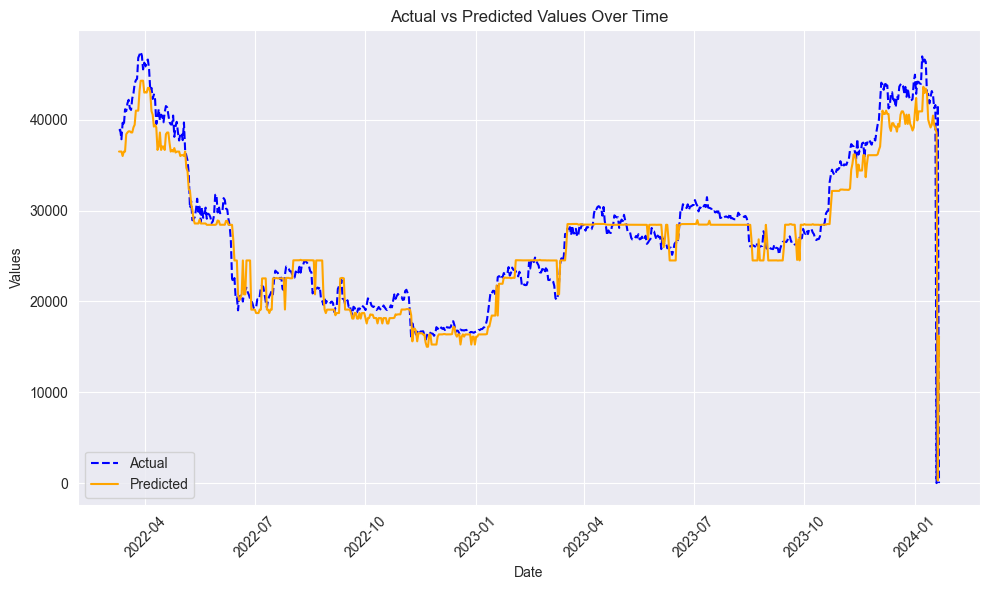

In [351]:
 import matplotlib.pyplot as plt
import pandas as pd

# Example setup (assuming you have y_test, y_pred, and dates_test available as arrays or series)
results = pd.DataFrame({
    'Date': dates,       # Replace with your actual dates for the test set
    'Actual': y_test,         # Replace with your actual y_test values
    'Predicted': y_pred       # Replace with your predicted y_pred values
})

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue', linestyle='--')

# Plotting the predicted values
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='orange', linestyle='-')

# Adding titles and labels
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
